## Observations and Insights 

In [661]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_df = pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID")

# Display the data table for preview
combined_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [662]:
# Checking the number of mice.
numberOfMice = combined_mouse_df["Mouse ID"].nunique()
print(f"The number of mice in the study: {numberOfMice}")

The number of mice in the study: 249


In [663]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMice = combined_mouse_df.groupby(["Mouse ID", "Timepoint"])

#if the count of Timepoint is greater than 1 then there must be a duplicate entry for this Mouse ID
duplicateMiceIDs = duplicateMice["Timepoint"].count().loc[duplicateMice["Timepoint"].count() > 1, :] 

#Mouse ID is the index at location 0 of this Series; using the leftmost statement returns a tuple - look at index 0 of the tuple for the actual value of Mouse ID
duplicateMouseIDResult = duplicateMiceIDs.index[0][0]
print(f"The single duplicate Mouse ID: {duplicateMouseIDResult}")

The single duplicate Mouse ID: g989


In [664]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#get names of indexes for when Mouse ID has the value equal to the duplicate Mouse ID found earlier
indexName = combined_mouse_df[combined_mouse_df['Mouse ID'] == duplicateMouseIDResult].index
#delete the row index from the data frame
clean_mouse_df = combined_mouse_df.drop(indexName)

In [665]:
# Checking the number of mice in the clean DataFrame.
mouseCount = combined_mouse_df["Mouse ID"].nunique()
cleanMouseCount = clean_mouse_df["Mouse ID"].nunique()
print(f"Number of mice before cleaning the data: {mouseCount}")
print(f"Number of mice after cleaning the data: {cleanMouseCount}")

Number of mice before cleaning the data: 249
Number of mice after cleaning the data: 248


## Summary Statistics

In [666]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_regimen_df = clean_mouse_df.groupby("Drug Regimen")

drugMeans = drug_regimen_df["Tumor Volume (mm3)"].mean()
drugMedians = drug_regimen_df["Tumor Volume (mm3)"].median()
drugVariance = drug_regimen_df["Tumor Volume (mm3)"].var()
drugStandardDeviation = drug_regimen_df["Tumor Volume (mm3)"].std()
drugStandardErrorOfMean = drug_regimen_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
drugNames = list(drug_regimen_df["Drug Regimen"].count().index) #get the drug names from the index; convert the names of the drugs to a list
drugSummary_df = pd.DataFrame() #create a new data frame from scratch
drugSummary_df["Drug"] = drugNames #assign the list to the "Drug" column of the data frame
drugSummary_df["Mean"] = list(drugMeans) #convert the Pandas Series variables to lists to more intuitively assign values
drugSummary_df["Median"] = list(drugMedians)
drugSummary_df["Variance"] = list(drugVariance)
drugSummary_df["Standard Dev"] = list(drugStandardDeviation)
drugSummary_df["SEM"] = list(drugStandardErrorOfMean)

drugSummary_df.style.hide_index() #print data frame without the index numbers

Drug,Mean,Median,Variance,Standard Dev,SEM
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [667]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_df["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Dev', 'sem': 'SEM'})

,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

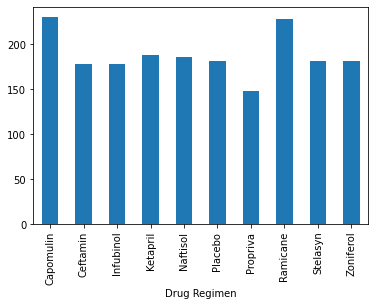

In [668]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_regimen_df["Tumor Volume (mm3)"].count().plot.bar()

Text(0.5, 1.0, 'Drug Regimen Measurements')

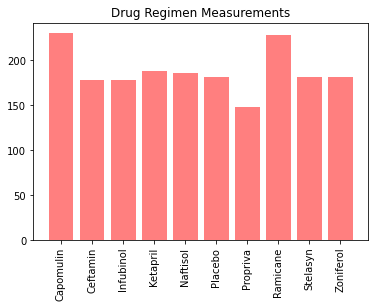

In [669]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
tumorVolumes = list(drug_regimen_df["Tumor Volume (mm3)"].count()) #converting to list for easier access to values
drugNames = list(drug_regimen_df["Drug Regimen"].count().index) #get the drug names from the index; convert the names of the drugs to a list
x_axis = drugNames

plt.bar(x_axis, tumorVolumes, color='r', alpha=0.5, align="center")
plt.xticks(rotation=90) #rotate the names of the drugs 90 degrees so the text does not run together
plt.title("Drug Regimen Measurements")

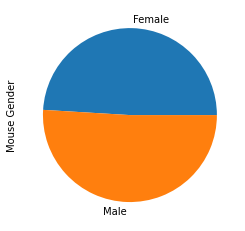

In [670]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean_mouse_df.groupby("Sex")["Mouse ID"].count().plot.pie(label="Mouse Gender")

Text(0.5, 1.0, 'Mouse Gender Count')

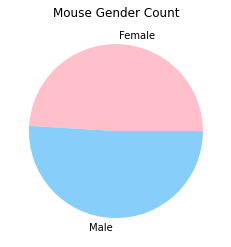

In [701]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_gender_series = clean_mouse_df.groupby("Sex")["Mouse ID"].count() #creating a series for the count of each gender of mouse
genderType = list(mouse_gender_series.index) #get the gender name from the index; convert the gender name data to a list
colors = ["pink", "lightskyblue"]

plt.pie(mouse_gender_series, labels = genderType, colors = colors)
plt.title("Mouse Gender Count")

## Quartiles, Outliers and Boxplots

In [672]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [673]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [674]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [675]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [676]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [677]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
